# Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Create some random-ish scatter data

In [2]:
x = np.random.normal(scale=1.5, size=[20])
b = np.random.normal(scale=2, size=[20])
y = (3 * x) + (2 * b)

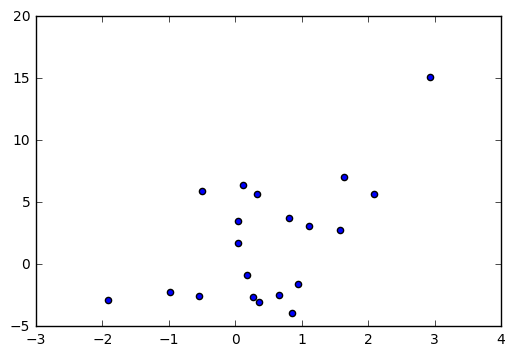

In [3]:
plt.scatter(x, y)
plt.show()

# Create our linear model graph

* `x_placeholder` and `y_placeholder` are our placeholder operations, which hold the input and correct output, respectively
* Our `m` and `b` units are `tf.Variable` nodes. These are what will be trained by our optimizer object. We instantiate `m` to have a normal distribution (with values +/- 2 standard deviations resampled), while `b` starts off as a vector of zeros
* We get our estimated value, `y_hat` by multiplying `m` and `x`, then adding b.
* We're using mean squared error as our target function
* `GradientDescentOptimizer` is one of several `tf.Optimizer` classes, this one performs standard gradient descent. We set our learning rate to 0.05, and our goal is to minimize `error`

In [4]:
x_placeholder = tf.placeholder(tf.float32, [None], name='x')
y_placeholder = tf.placeholder(tf.float32, [None], name='y')
m = tf.Variable(tf.truncated_normal([]), name='m')
b = tf.Variable(tf.constant(0, dtype=tf.float32), name='b')
y_hat = tf.mul(m, x_placeholder) + b

error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name='MSE')

train = tf.train.GradientDescentOptimizer(0.05).minimize(error)

init = tf.initialize_all_variables()

# Now run the graph

In [5]:
sess = tf.Session()
sess.run(init)

x_test = np.array([-5.0, 0.0, 5.0])
test_dict = {x_placeholder: x_test}
snapshots = []

for i in range(50):
    feed_dict = {
        x_placeholder: x,
        y_placeholder: y
    }
    err, _ = sess.run([error, train], feed_dict=feed_dict)
    print(str(i) + ":\tMSE: %.3f" % err)
    
    if i in [0, 1, 4, 10, 49]:
        y_test = sess.run(y_hat, feed_dict=test_dict)
        snapshots.append((i, y_test))
    

0:	MSE: 25.914
1:	MSE: 22.484
2:	MSE: 20.119
3:	MSE: 18.485
4:	MSE: 17.353
5:	MSE: 16.568
6:	MSE: 16.021
7:	MSE: 15.639
8:	MSE: 15.370
9:	MSE: 15.180
10:	MSE: 15.045
11:	MSE: 14.948
12:	MSE: 14.878
13:	MSE: 14.827
14:	MSE: 14.789
15:	MSE: 14.760
16:	MSE: 14.738
17:	MSE: 14.721
18:	MSE: 14.708
19:	MSE: 14.697
20:	MSE: 14.689
21:	MSE: 14.682
22:	MSE: 14.676
23:	MSE: 14.671
24:	MSE: 14.667
25:	MSE: 14.664
26:	MSE: 14.661
27:	MSE: 14.659
28:	MSE: 14.657
29:	MSE: 14.655
30:	MSE: 14.653
31:	MSE: 14.652
32:	MSE: 14.651
33:	MSE: 14.650
34:	MSE: 14.649
35:	MSE: 14.648
36:	MSE: 14.647
37:	MSE: 14.647
38:	MSE: 14.646
39:	MSE: 14.646
40:	MSE: 14.645
41:	MSE: 14.645
42:	MSE: 14.645
43:	MSE: 14.644
44:	MSE: 14.644
45:	MSE: 14.644
46:	MSE: 14.644
47:	MSE: 14.644
48:	MSE: 14.643
49:	MSE: 14.643


# Graph what the model looks like as it learns

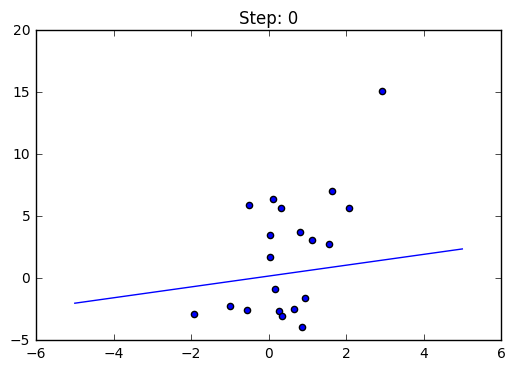

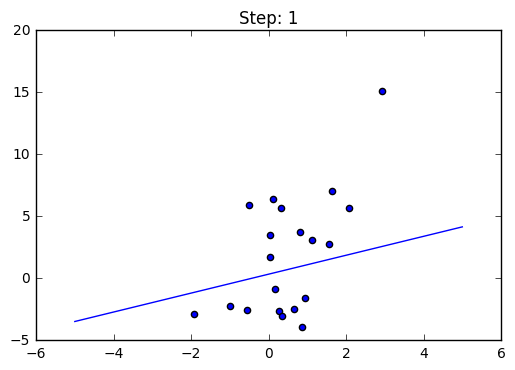

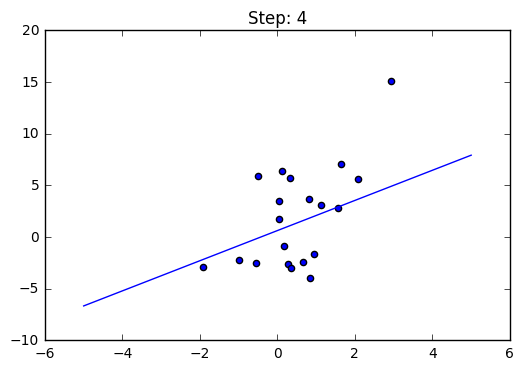

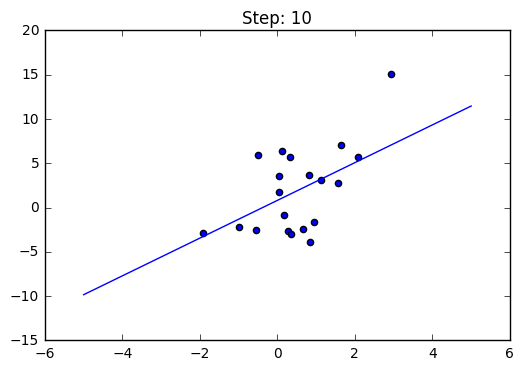

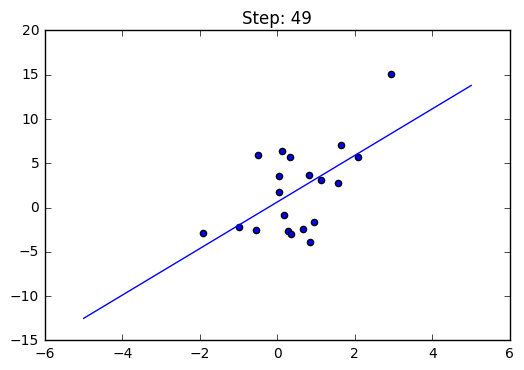

In [6]:
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title('Step: ' + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
plt.show()